# HOMEWORK 2: Cassidy Tao

---

## Task 1 - NRI Data Cleaning

__1. Import the NRI data. Ensure that the [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code) variable ('STCOFIPS') is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [1]:
import pandas as pd
import numpy as np
NRI_data = pd.read_csv(r'C:\Users\ctao\OneDrive - RAND Corporation\Desktop\Class\Machine Learning\Machine_Learning_2025\data\raw\NRI_Table_Counties (5)\NRI_Table_Counties.csv',dtype={'STCOFIPS':str})
NRI_data

,OID_,NRI_ID,STATE,STATEABBRV,STATEFIPS,COUNTY,COUNTYTYPE,COUNTYFIPS,STCOFIPS,POPULATION,...,WNTW_EALS,WNTW_EALR,WNTW_ALRB,WNTW_ALRP,WNTW_ALRA,WNTW_ALR_NPCTL,WNTW_RISKV,WNTW_RISKS,WNTW_RISKR,NRI_VER
0,1,C01001,Alabama,AL,1,Autauga,County,1,01001,58764,...,15.784587,Very Low,2.687716e-07,7.410082e-09,8.725777e-06,10.461158,8494.906508,12.217626,Very Low,March 2023
1,2,C01003,Alabama,AL,1,Baldwin,County,3,01003,231365,...,56.205509,Relatively Moderate,1.268231e-09,2.287120e-08,1.548360e-07,13.339523,65619.701638,52.083996,Relatively Low,March 2023
2,3,C01005,Alabama,AL,1,Barbour,County,5,01005,25160,...,18.632002,Relatively Low,5.788050e-07,2.347236e-08,7.606598e-07,16.125039,15501.730335,19.535476,Very Low,March 2023
3,4,C01007,Alabama,AL,1,Bibb,County,7,01007,22239,...,13.308573,Very Low,9.014679e-07,1.270300e-08,1.202015e-05,16.991643,7496.186940,11.104041,Very Low,March 2023
4,5,C01009,Alabama,AL,1,Blount,County,9,01009,58992,...,23.645930,Relatively Low,5.268425e-07,1.482016e-08,2.002965e-07,12.039616,17175.160729,21.444480,Very Low,March 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,C72151,Puerto Rico,PR,72,Yabucoa,Municipio,151,72151,30397,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3227,3228,C72153,Puerto Rico,PR,72,Yauco,Municipio,153,72153,34151,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3228,3229,C78010,Virgin Islands,VI,78,St. Croix,Island,10,78010,40913,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023
3229,3230,C78020,Virgin Islands,VI,78,St. John,Island,20,78020,3882,...,0.000000,No Expected Annual Losses,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,Insufficient Data,March 2023


__2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.__

In [2]:

cols_to_include = [col for col in NRI_data.columns if ((col.endswith('_AFREQ')) or
    (col.endswith('_RISKR')) or (col == 'STCOFIPS'))]
print(cols_to_include)
NRI_data = NRI_data[cols_to_include]

['STCOFIPS', 'AVLN_AFREQ', 'AVLN_RISKR', 'CFLD_AFREQ', 'CFLD_RISKR', 'CWAV_AFREQ', 'CWAV_RISKR', 'DRGT_AFREQ', 'DRGT_RISKR', 'ERQK_AFREQ', 'ERQK_RISKR', 'HAIL_AFREQ', 'HAIL_RISKR', 'HWAV_AFREQ', 'HWAV_RISKR', 'HRCN_AFREQ', 'HRCN_RISKR', 'ISTM_AFREQ', 'ISTM_RISKR', 'LNDS_AFREQ', 'LNDS_RISKR', 'LTNG_AFREQ', 'LTNG_RISKR', 'RFLD_AFREQ', 'RFLD_RISKR', 'SWND_AFREQ', 'SWND_RISKR', 'TRND_AFREQ', 'TRND_RISKR', 'TSUN_AFREQ', 'TSUN_RISKR', 'VLCN_AFREQ', 'VLCN_RISKR', 'WFIR_AFREQ', 'WFIR_RISKR', 'WNTW_AFREQ', 'WNTW_RISKR']


__3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.__

In [3]:
NRI_missing = NRI_data.isna().sum()
NRI_missing

STCOFIPS         0
AVLN_AFREQ    3023
AVLN_RISKR       0
CFLD_AFREQ    2646
CFLD_RISKR       0
CWAV_AFREQ       0
CWAV_RISKR       0
DRGT_AFREQ       7
DRGT_RISKR       0
ERQK_AFREQ       0
ERQK_RISKR       0
HAIL_AFREQ       7
HAIL_RISKR       0
HWAV_AFREQ       0
HWAV_RISKR       0
HRCN_AFREQ     918
HRCN_RISKR       0
ISTM_AFREQ     229
ISTM_RISKR       0
LNDS_AFREQ      40
LNDS_RISKR       0
LTNG_AFREQ     123
LTNG_RISKR       0
RFLD_AFREQ       0
RFLD_RISKR       0
SWND_AFREQ       7
SWND_RISKR       0
TRND_AFREQ       7
TRND_RISKR       0
TSUN_AFREQ    3103
TSUN_RISKR       0
VLCN_AFREQ    3125
VLCN_RISKR       0
WFIR_AFREQ      88
WFIR_RISKR       0
WNTW_AFREQ       0
WNTW_RISKR       0
dtype: int64

__4. Create a new column in the original data table indicating whether or not 'AVLN_AFREQ' is missing or observed. Show the cross-tabulation of the 'AVLN_AFREQ' missingness and 'AVLN_RISKR' columns (including missing values). What do you observe? What implications does this have for dealing with missing data?__


ANSWER: I observe that all of the missing values have an avelanch risk of Not Applicable. This likely means that they occur in counties without avalanche risks. It may be best to deal with the missing data by setting the risk to 0, or removing the counties.

In [4]:
NRI_data['MISSING_AVLN'] = NRI_data['AVLN_AFREQ'].isna()
crosstab = pd.crosstab(NRI_data['MISSING_AVLN'],NRI_data['AVLN_RISKR'])
crosstab

C:\Users\ctao\AppData\Local\Temp\ipykernel_26796\3106178983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NRI_data['MISSING_AVLN'] = NRI_data['AVLN_AFREQ'].isna()


AVLN_RISKR,Not Applicable,Relatively High,Relatively Low,Relatively Moderate,Very High,Very Low
MISSING_AVLN,,,,,,
False,0,15,52,33,9,99
True,3023,0,0,0,0,0


__5. Assuming that a risk that is "not applicable" to a county has an annualized frequency of 0, impute the relevant missing values in the '\_AFREQ' columns with 0.__

In [5]:
#NRI_data['AVLN_AFREQ'] = [row['AVLN_AFREQ'] if row['MISSING_AVLN'] == False else 0 for i,row in NRI_data.iterrows()]
cols_to_change = [col for col in NRI_data.columns if col.endswith('_AFREQ')]
NRI_data[cols_to_change] = NRI_data[cols_to_change].fillna(0)
#NRI_data['MISSING_AVLN_NEW'] = NRI_data['AVLN_AFREQ'].isna()
#crosstab = pd.crosstab(NRI_data['MISSING_AVLN_NEW'],NRI_data['AVLN_RISKR'])
#crosstab

C:\Users\ctao\AppData\Local\Temp\ipykernel_26796\3907878857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NRI_data[cols_to_change] = NRI_data[cols_to_change].fillna(0)


## Task 2: SVI Data Cleaning

__1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

__2. Subset the SVI data to include only the following columns:__ 
 `ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`


In [6]:
SVI_data = pd.read_csv(r'C:\Users\ctao\OneDrive - RAND Corporation\Desktop\Class\Machine Learning\Machine_Learning_2025\data\raw\SVI_2022_US_county.csv',dtype={'FIPS':str})

columns = ["ST", "STATE", "ST_ABBR", "STCNTY", "COUNTY", "FIPS", "LOCATION", "AREA_SQMI",
    "E_TOTPOP", "EP_POV150", "EP_UNEMP", "EP_HBURD", "EP_NOHSDP", "EP_UNINSUR",
    "EP_AGE65", "EP_AGE17", "EP_DISABL", "EP_SNGPNT", "EP_LIMENG", "EP_MINRTY",
    "EP_MUNIT", "EP_MOBILE", "EP_CROWD", "EP_NOVEH", "EP_GROUPQ", "EP_NOINT",
    "EP_AFAM", "EP_HISP", "EP_ASIAN", "EP_AIAN", "EP_NHPI", "EP_TWOMORE", "EP_OTHERRACE"]
SVI_data = SVI_data[columns] #SUBSET TO COLS

__2. Create a table / dataframe that shows the number of missing values in each column.
(Hint: if you wrote a function for Task 1, you can reuse it here.)__

In [7]:
SVI_missing = SVI_data.isna().sum()
SVI_missing

ST              0
STATE           0
ST_ABBR         0
STCNTY          0
COUNTY          0
FIPS            0
LOCATION        0
AREA_SQMI       0
E_TOTPOP        0
EP_POV150       0
EP_UNEMP        0
EP_HBURD        0
EP_NOHSDP       0
EP_UNINSUR      0
EP_AGE65        0
EP_AGE17        0
EP_DISABL       0
EP_SNGPNT       0
EP_LIMENG       0
EP_MINRTY       0
EP_MUNIT        0
EP_MOBILE       0
EP_CROWD        0
EP_NOVEH        0
EP_GROUPQ       0
EP_NOINT        0
EP_AFAM         0
EP_HISP         0
EP_ASIAN        0
EP_AIAN         0
EP_NHPI         0
EP_TWOMORE      0
EP_OTHERRACE    0
dtype: int64

## Task 3 - Data Merging

__1. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa. Describe any discrepancies and possible causes? What to these discrepancies, if any, mean for interpreting results based on the merged dataset moving forward?__

Answer: I notice that codes beginning with 09 are often absent. It seems to be the case that this is a specific county (conneticut) which does not match between data sets due to a change in fips codes. The rest are not part of CONUS. This may mean that we should remove non contiguous areas from our analysis, since they are not covered by the SVI data.

In [8]:
nri_but_not_svi = [fips for fips in NRI_data['STCOFIPS'] if not (fips in list(SVI_data['FIPS']))]
svi_but_not_nri = [fips for fips in SVI_data['FIPS'] if not (fips in list(NRI_data['STCOFIPS']))]
print('NRI but not SVI: ',nri_but_not_svi)
print('SVI but not NRI: ',svi_but_not_nri)

NRI but not SVI:  ['09001', '09003', '09005', '09007', '09009', '09011', '09013', '09015', '60010', '60020', '60050', '66010', '69100', '69110', '69120', '72001', '72003', '72005', '72007', '72009', '72011', '72013', '72015', '72017', '72019', '72021', '72023', '72025', '72027', '72029', '72031', '72033', '72035', '72037', '72039', '72041', '72043', '72045', '72047', '72049', '72051', '72053', '72054', '72055', '72057', '72059', '72061', '72063', '72065', '72067', '72069', '72071', '72073', '72075', '72077', '72079', '72081', '72083', '72085', '72087', '72089', '72091', '72093', '72095', '72097', '72099', '72101', '72103', '72105', '72107', '72109', '72111', '72113', '72115', '72117', '72119', '72121', '72123', '72125', '72127', '72129', '72131', '72133', '72135', '72137', '72139', '72141', '72143', '72145', '72147', '72149', '72151', '72153', '78010', '78020', '78030']
SVI but not NRI:  ['09110', '09120', '09130', '09140', '09150', '09160', '09170', '09180', '09190']


__2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.__

In [9]:
Merged_data = NRI_data.merge(SVI_data,left_on='STCOFIPS',right_on='FIPS',how='outer')

__3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.__

In [10]:
Merged_data.isna().sum()

STCOFIPS         9
AVLN_AFREQ       9
AVLN_RISKR       9
CFLD_AFREQ       9
CFLD_RISKR       9
                ..
EP_ASIAN        96
EP_AIAN         96
EP_NHPI         96
EP_TWOMORE      96
EP_OTHERRACE    96
Length: 71, dtype: int64

## Task 5: Data Analysis

__1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values.
(Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables.)__

Answer: Note, I could do this with a single line as shown, but I will also do it in an object oriented way.

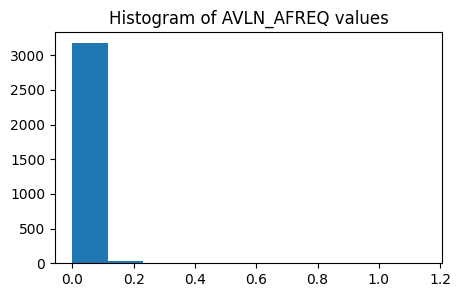

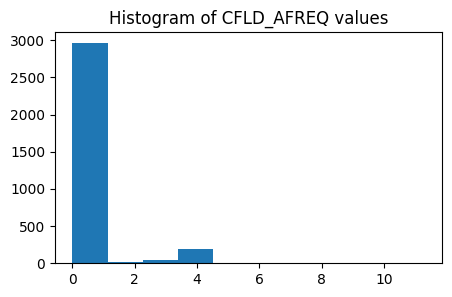

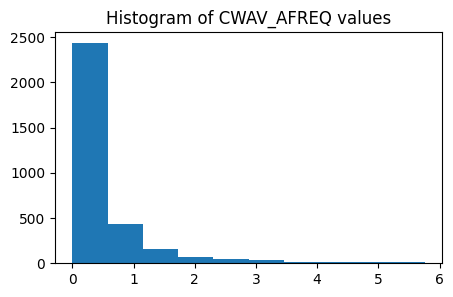

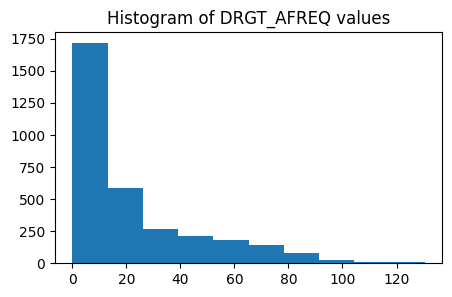

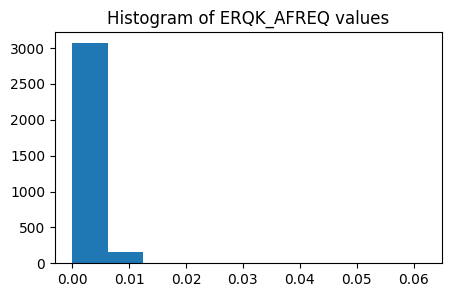

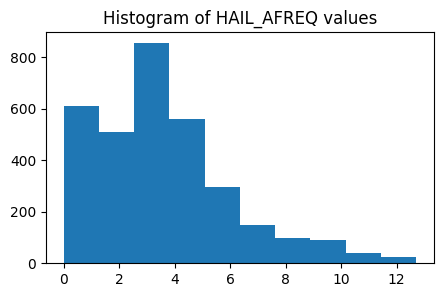

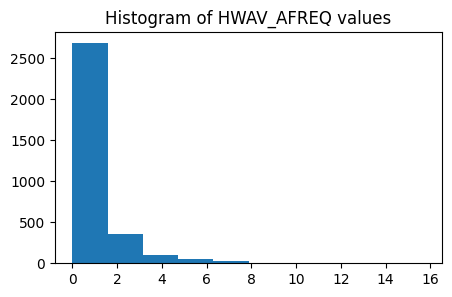

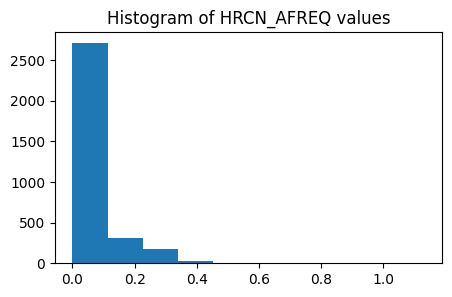

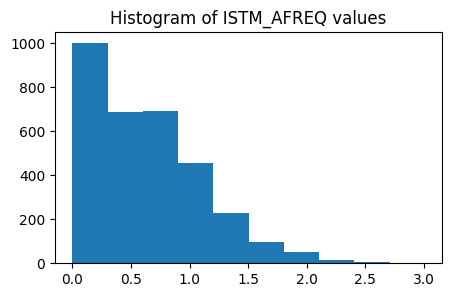

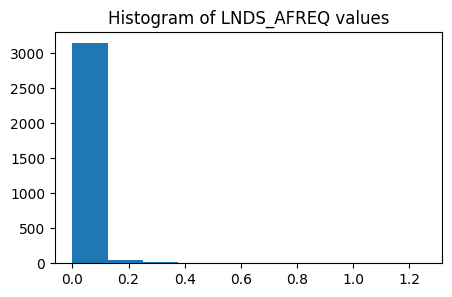

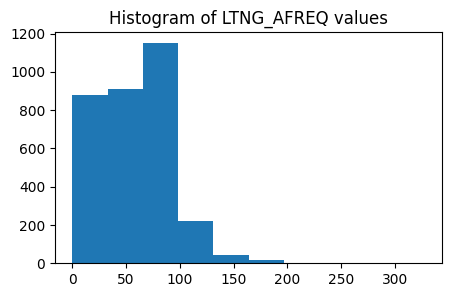

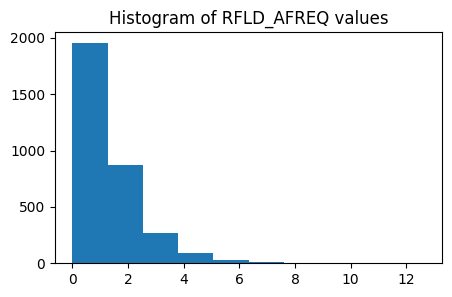

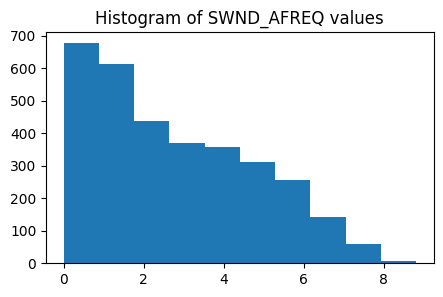

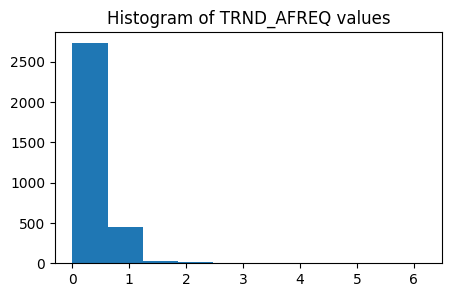

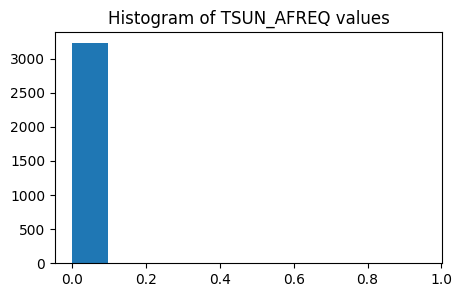

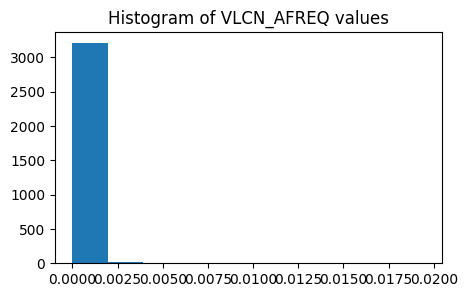

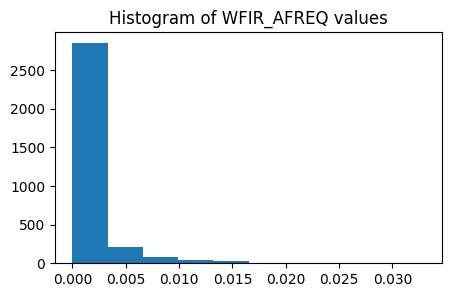

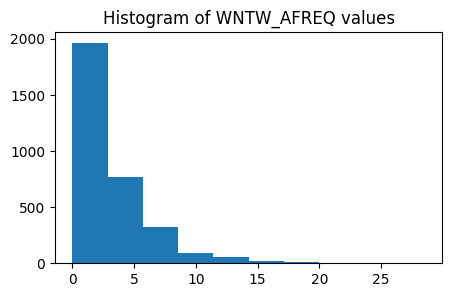

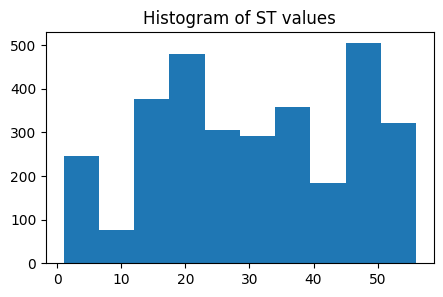

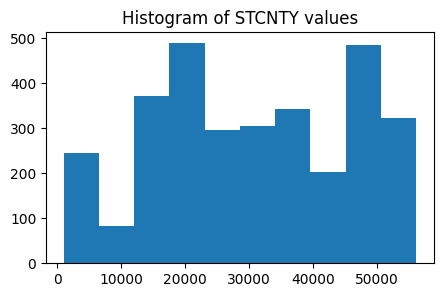

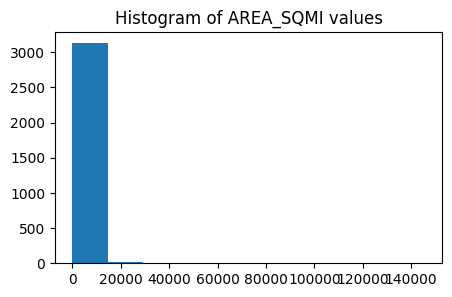

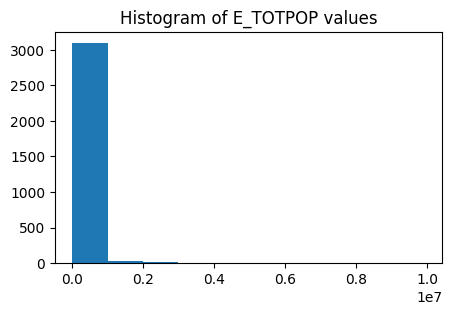

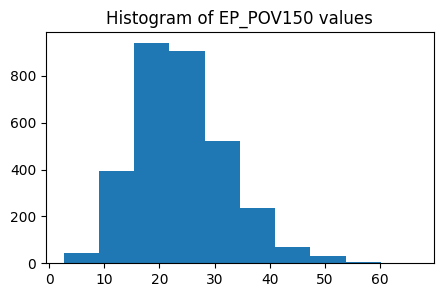

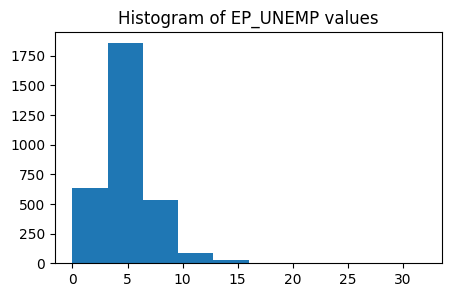

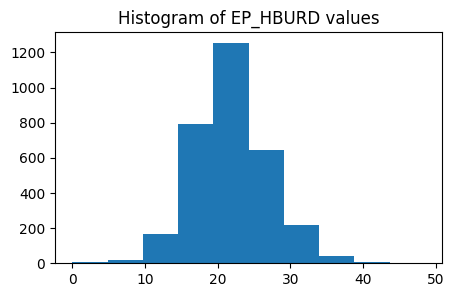

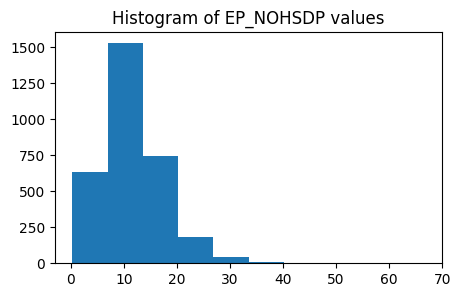

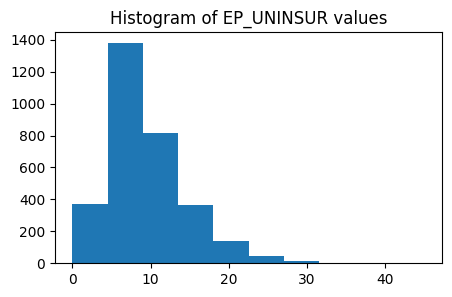

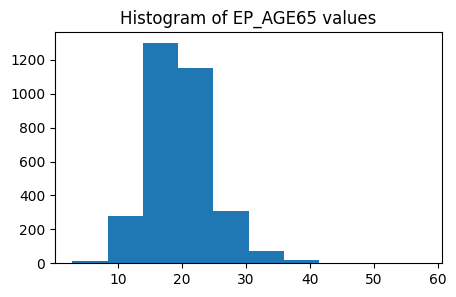

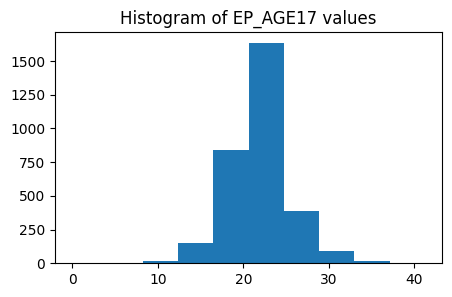

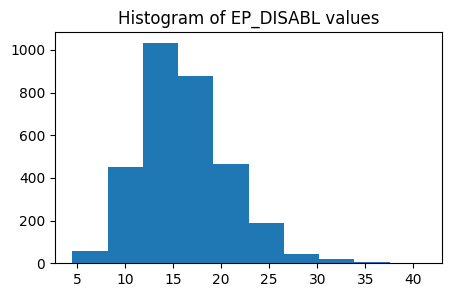

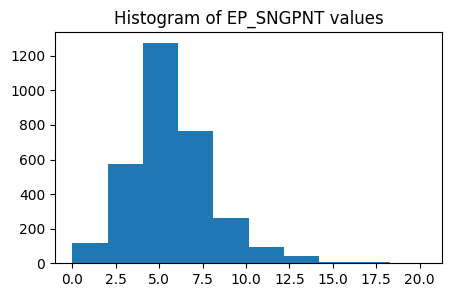

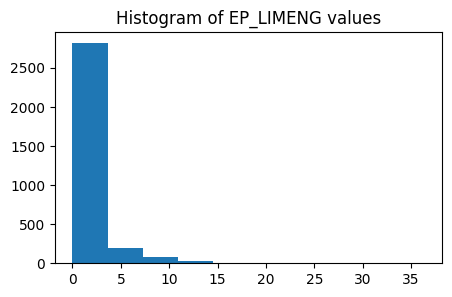

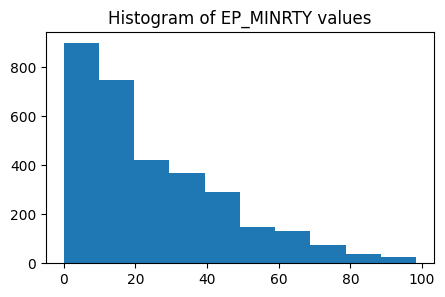

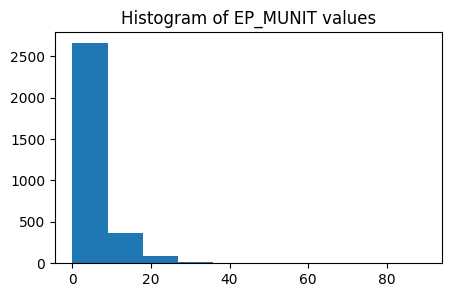

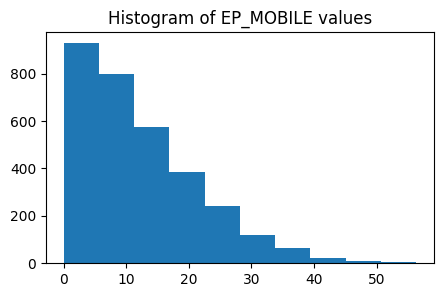

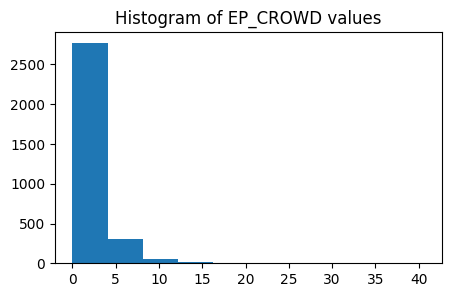

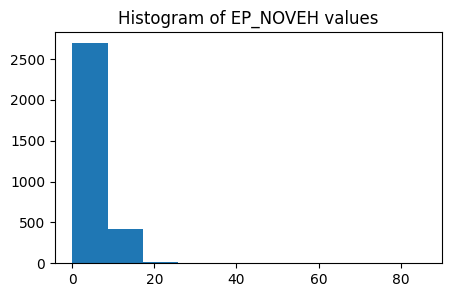

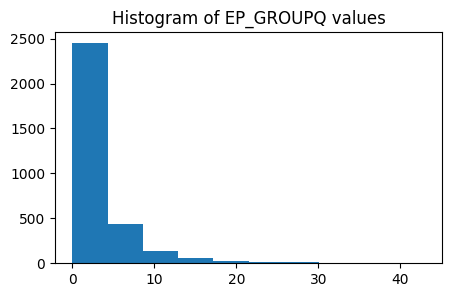

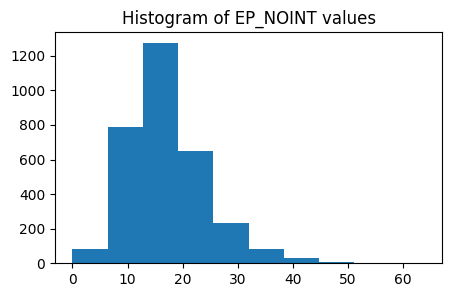

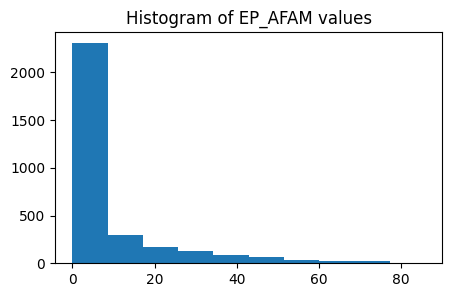

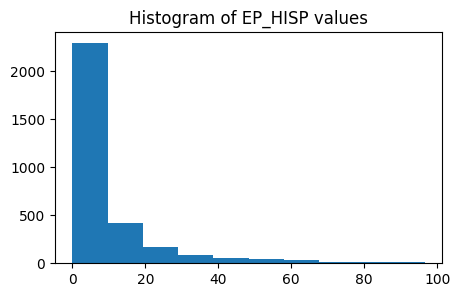

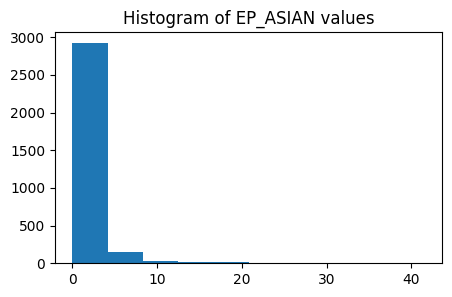

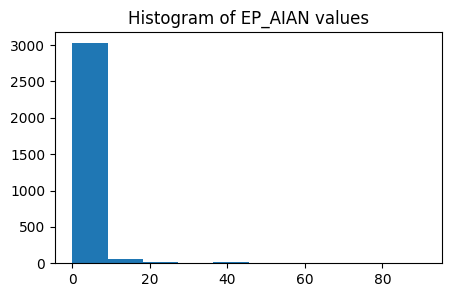

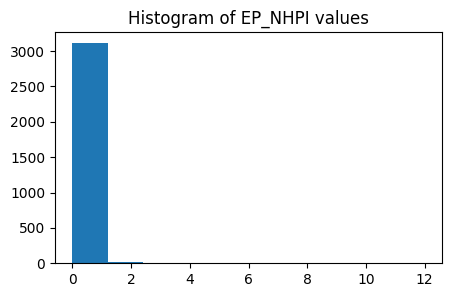

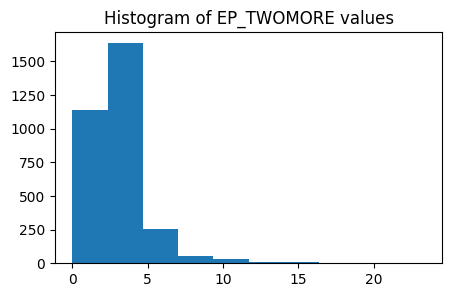

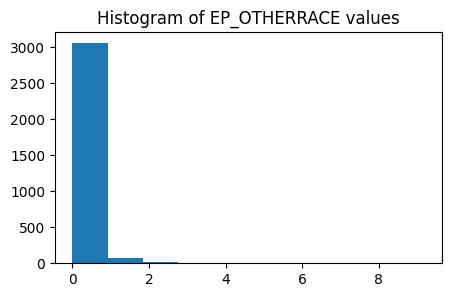

In [11]:
import matplotlib.pyplot as plt
fig = Merged_data.hist(figsize=(20,20))
plt.close()

def plot_hist(col):
    plt.figure(figsize=(5,3))
    plt.hist(x= Merged_data[col])
    plt.title(f'Histogram of {col} values')
    plt.show()
for col in [col for col in Merged_data.columns if pd.api.types.is_numeric_dtype(Merged_data[col])]:
    plot_hist(col)

## Task 5 - Save Data

__1. Create a 'processed' folder within the 'data' folder.__

__2. Save the merged data file to the 'processed' folder.__

In [12]:
Merged_data.to_csv(r'C:\Users\ctao\OneDrive - RAND Corporation\Desktop\Class\Machine Learning\Machine_Learning_2025\data\Processed\merged_data.csv')